# Người thực hiện: Hoàng Duy Thiện Mạnh
# Mục tiêu chung:
Xây dựng một mô hình dự đoán sự ảnh hưởng của các yếu tố đến doanh thu của doanh nghiệp
# Câu hỏi :
1. Công ty nên phân bổ ngân sách tiếp thị hạn chế của mình cho năm tới như thế nào?
2. Công ty nên tập trung vào hình mẫu người ảnh hưởng nào?
3. Công ty có thể cắt giảm ngân sách về TV vì nó chiếm nhiều chi phí nhất?

# Quy trình thực hiện
1. Khai báo sử dụng các thư viện cần thiết

2. Tải dữ liệu , trực quan hóa và khám phá

3. Làm sạch dữ liệu

4. Xử lý các giá trị ngoại lai Chuẩn hóa các biến nhằm khắc phục ảnh hưởng do khác biệt về thang đo

5. Chia tập dữ liệu thành tập huấn luyện và kiểm tra

6. Xác định và ước tính mô hình hồi quy tuyến tính bằng cách sử dụng tập dữ liệu huấn luyện với các biến độc lập và 01 biến phụ thuộ

7. Đánh giá hiệu quả của mô hình bằng cách sử dụng tập dữ liệu kiểm tra, sử dụng các số liệu như R bình thường trung bình

8. Giải thích các kết quả của mô hình hồi quy, bao gồm các ước tính hệ số và ý nghĩa của chúng

9. Trực quan hóa đường hồi quy và biểu đồ phân tán của dữ liệu kiểm tra.

10. Sử dụng mô hình để đáp ứng các mục tiêu đặt ra.

# 1. Khai báo các thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
pd.options.display.float_format = '{:,.3f}'.format
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt


# 2. Tải dữ liệu, trực quan và khám phá

In [2]:
df = pd.read_csv("advertising with MISSES.csv")
df.head()

,Unnamed: 0,TV,Radio,Social Media,Influencer,Sales
0,0,16.000,6.566,2.908,Thuy Tien,54.733
1,1,13.000,9.238,2.410,Thuy Tien,46.678
2,2,41.000,15.886,2.913,Thuy Tien,150.178
3,3,83.000,30.020,6.922,Thuy Tien,298.246
4,4,15.000,8.437,1.406,Thuy Linh,56.594


In [3]:
df= df.drop(columns=["Unnamed: 0"])   
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.000,6.566,2.908,Thuy Tien,54.733
1,13.000,9.238,2.410,Thuy Tien,46.678
2,41.000,15.886,2.913,Thuy Tien,150.178
3,83.000,30.020,6.922,Thuy Tien,298.246
4,15.000,8.437,1.406,Thuy Linh,56.594


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


# 3. Làm sạch dữ liệu

In [5]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

<AxesSubplot:>

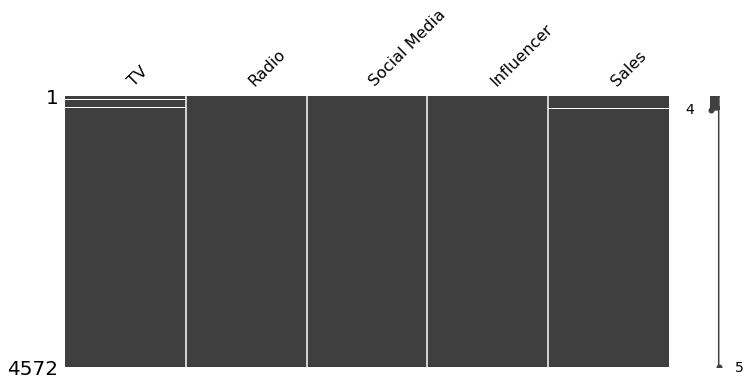

In [6]:
msno.matrix(df, figsize= (12,5))

<AxesSubplot:>

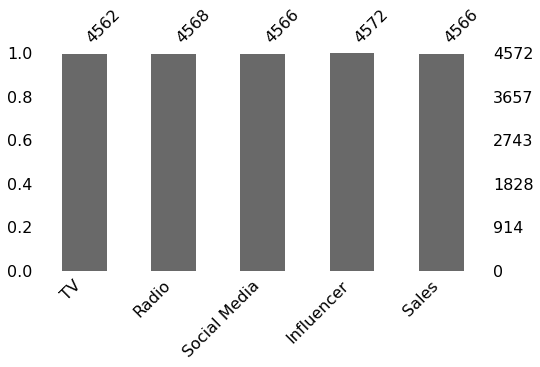

In [7]:
msno.bar(df, figsize= (8,4))

In [8]:
df.shape

(4572, 5)

In [9]:
df.dropna(inplace=True)  # dòng bị missing sẽ bị bỏ nếu dùng lệnh này
df

,TV,Radio,Social Media,Influencer,Sales
0,16.000,6.566,2.908,Thuy Tien,54.733
1,13.000,9.238,2.410,Thuy Tien,46.678
2,41.000,15.886,2.913,Thuy Tien,150.178
3,83.000,30.020,6.922,Thuy Tien,298.246
4,15.000,8.437,1.406,Thuy Linh,56.594
...,...,...,...,...,...
4567,26.000,4.472,0.717,Thuy Linh,94.686
4568,71.000,20.611,6.546,Thuy Dung,249.102
4569,44.000,19.800,5.096,Thuy Linh,163.631
4570,71.000,17.535,1.941,Thu Thao,253.610


In [10]:
df.duplicated().sum() 

0

In [11]:
df['Influencer'].value_counts()

Thuy Tien    1152
Thuy Linh    1148
Thuy Dung    1134
Thu Thao     1112
Name: Influencer, dtype: int64

In [12]:
df = pd.get_dummies(df)

In [13]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Thu Thao',
       'Influencer_Thuy Dung', 'Influencer_Thuy Linh', 'Influencer_Thuy Tien'],
      dtype='object')

In [14]:

cols =['TV', 'Radio', 'Social Media', 'Influencer_Thu Thao',
       'Influencer_Thuy Dung', 'Influencer_Thuy Linh', 'Influencer_Thuy Tien','Sales']
df = df [cols]

In [15]:
df.corr()

,TV,Radio,Social Media,Influencer_Thu Thao,Influencer_Thuy Dung,Influencer_Thuy Linh,Influencer_Thuy Tien,Sales
TV,1.000,0.869,0.528,0.022,-0.004,-0.005,-0.013,0.999
Radio,0.869,1.000,0.606,0.013,-0.009,0.002,-0.007,0.869
Social Media,0.528,0.606,1.000,0.014,-0.013,-0.014,0.012,0.527
Influencer_Thu Thao,0.022,0.013,0.014,1.000,-0.328,-0.331,-0.332,0.022
Influencer_Thuy Dung,-0.004,-0.009,-0.013,-0.328,1.000,-0.335,-0.336,-0.004
Influencer_Thuy Linh,-0.005,0.002,-0.014,-0.331,-0.335,1.000,-0.339,-0.005
Influencer_Thuy Tien,-0.013,-0.007,0.012,-0.332,-0.336,-0.339,1.000,-0.013
Sales,0.999,0.869,0.527,0.022,-0.004,-0.005,-0.013,1.000


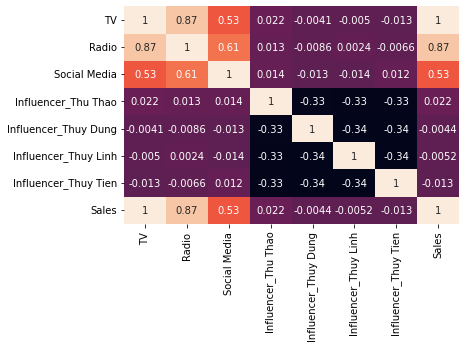

In [16]:
fig, ax = plt.subplots(figsize =(6,4))
sns.heatmap(data =df.corr(),annot =True, cbar=False)
plt.show()

# 4. Xử lý giá trị ngoại lai

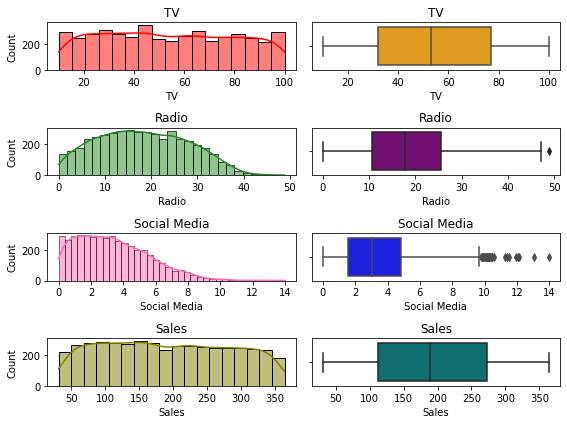

In [72]:
fig, ax = plt.subplots(4,2 ,figsize =(8,6))
sns.histplot(data =df, x="TV", ax=ax[0,0], kde=True, color='red')
ax[0,0].set_title("TV")
ax[0,1].set_title("TV")
sns.boxplot(data=df , x="TV", ax =ax[0,1], color='orange')
sns.histplot(data =df, x="Radio", ax=ax[1,0], kde=True, color= 'forestgreen')
ax[1,1].set_title("Radio")
ax[1,0].set_title("Radio")
sns.boxplot(data=df , x="Radio", ax =ax[1,1], color ='purple')

sns.histplot(data =df, x="Social Media", ax=ax[2,0], kde=True, color='hotpink')
ax[2,1].set_title("Social Media")
ax[2,0].set_title("Social Media")
sns.boxplot(data=df , x="Social Media", ax =ax[2,1], color='blue')

sns.histplot(data =df, x="Sales", ax=ax[3,0], kde=True, color='olive')
ax[3,1].set_title("Sales")
ax[3,0].set_title("Sales")
sns.boxplot(data=df , x="Sales", ax =ax[3,1], color='teal')
plt.tight_layout()
plt.show()

In [69]:
scaler = StandardScaler() # Xác định pp chuẩn hóa nào
normalized_df=scaler.fit_transform(df[['TV','Radio','Social Media','Sales']])


In [19]:
normalized_df  = pd.DataFrame({"TV": normalized_df[:,0],
                            "Radio": normalized_df[:,1],
                            "Social Media": normalized_df[:,2],
                               "Influencer_Thu Thao": df['Influencer_Thu Thao'],
                               "Influencer_Thuy Dung": df['Influencer_Thuy Dung'],
                               "Influencer_Thuy Linh": df['Influencer_Thuy Linh'],
                               "Influencer_Thuy Tien": df['Influencer_Thuy Tien'],
                               "Sales": normalized_df[:,3]}) 

# 5.Chia tập dữ liệu thành tập huấn luyện và kiểm tra

In [20]:
normalized_df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer_Thu Thao',
       'Influencer_Thuy Dung', 'Influencer_Thuy Linh', 'Influencer_Thuy Tien',
       'Sales'],
      dtype='object')

In [21]:
y = normalized_df['Sales']
X = normalized_df[['TV', 'Radio', 'Social Media', 'Influencer_Thu Thao',
       'Influencer_Thuy Dung', 'Influencer_Thuy Linh', 'Influencer_Thuy Tien']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3182, 7), (1364, 7), (3182,), (1364,))

# 6. Xác định và ước tính mô hình hồi quy tuyến tính bằng cách sử dụng tập dữ liệu huấn luyện với các biến độc lập và 01 biến phụ thuộc

In [47]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) # ước tính tham số của mô hình

LinearRegression()

# 7. Biểu diễn trực quan mô hình với dữ liệu kiểm tra

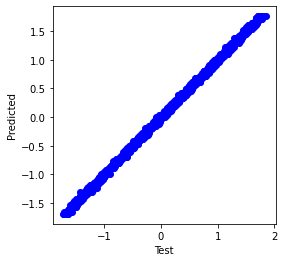

In [48]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(y_test, y_pred,color='b')
ax.set_xlabel("Test")
ax.set_ylabel("Predicted")
plt.show()

# 8.Đánh giá hiệu quả của mô hình bằng cách sử dụng tập dữ liệu kiểm tra, sử dụng các số liệu như R bình thường trung bình

In [49]:
# Độ chính xác của mô hình
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train score of trained model: {train_score*100}%')
print(f'Test score of trained model: {test_score*100}%')

Train score of trained model: 99.89961870708373%
Test score of trained model: 99.89917410532348%


# Nhận xét
# Train score và Test score xấp xỉ 100% cho thấy mô hình có độ chính xác rất cao, độ tin cậy cũng cao 

In [50]:
n = X_test.shape[0]   # Số quan sát trong tập dữ liẹu kiểm tra
k = X_test.shape[1]   # Số biến độc lập trong mô hình 

MSE = mean_squared_error(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)               

r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1) 

In [51]:
scores = [MSE, MAE, r2, adj_r2]
metrics = ['MSE', 'MAE', 'r2','adj_r2']
model_performance = pd.DataFrame({'Metric': metrics, 'Score':
                                 scores})
model_performance

,Metric,Score
0,MSE,0.001
1,MAE,0.026
2,r2,0.999
3,adj_r2,0.999


# Nhận xét: Các biến độc lập giải thích được 99,9 % sự thay đổi của biến phụ thuộc

# 9. Giải thích các kết quả của mô hình hồi quy , bao gồm các ước tính hệ số và ý nghĩa của chúng

In [52]:
print("Coefficient: ", [model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3], model.coef_[4], model.coef_[5], model.coef_[6]])
print("Intercept: ",model.intercept_)
print("Mô hình:")
print(f"Sales = {model.coef_[0]:.2f}*TV + {model.coef_[1]:.2f}*Radio + {model.coef_[2]:.2f}*Social media + {model.coef_[3]:.2f}* Influencer_Thu Thao + {model.coef_[4]:.2f}*Influencer_Thuy Dung + {model.coef_[5]:.2f}* Influencer_Thuy Linh + {model.coef_[6]:.2f}*Influencer_Thuy Tien + {model.intercept_:.2f}")

Coefficient:  [0.9998729890417966, -0.00013665820167260944, -0.00022942592358726237, 0.001016115115390331, -0.0005430169187790946, -0.0009145758292162451, 0.0004414776326051048]
Intercept:  -9.313494140416982e-05
Mô hình:
Sales = 1.00*TV + -0.00*Radio + -0.00*Social media + 0.00* Influencer_Thu Thao + -0.00*Influencer_Thuy Dung + -0.00* Influencer_Thuy Linh + 0.00*Influencer_Thuy Tien + -0.00


## - Mô hình trên cho ta thấy các biến có ảnh hưởng thế nào đến doanh số, nếu hệ sô dương sẽ làm tăng doanh số bán hàng, nếu hệ số âm sẽ chỉ ra điều ngược lại
## - Mô hình trên giúp ta dự đoán, để đưa ra sự đầu tư hợp lý cho từng loại chi phí và khả năng cắt giảm nếu có thể của chúng.
## - Mô hình cũng cho thấy biến TV có ảnh hưởng đáng kể đến Sales

# 10. Sử dụng mô hình

## - Một công ty có thể sử dụng mô hình này để xác định số tiền họ nên chi tiêu cho mỗi kênh quảng cáo nhằm tối đa hóa doanh số bán hàng của họ. Họ có thể nhập chi tiêu quảng cáo theo kế hoạch của mình vào mô hình và sử dụng kết quả doanh số bán hàng dự đoán để cung cấp thông tin cho quá trình ra quyết định của họ.
## - Tuy nhiên, điều quan trọng cần lưu ý là mô hình giả định mối quan hệ tuyến tính giữa các biến dự đoán và biến phụ thuộc và điều này có thể không phải lúc nào cũng đúng trong thực tế. Ngoài ra, việc giải thích các hệ số cần được thực hiện một cách thận trọng và trong bối cảnh của mô hình và dữ liệu cụ thể đang được phân tích